# Seasonal beer popularity

In [2]:
# Loading Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objs as go
import plotly.io as pio
from src.utils.jeanneHelper import JeanneHelper
helper = JeanneHelper()
import plotly.offline as py
py.init_notebook_mode(connected=True)

pio.renderers.default = 'notebook'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# Load data
df = pd.read_csv('data/beerAdvocateReviewsUSA.csv')

df.head()

,Unnamed: 0,rating,appearance,aroma,palate,taste,overall,country_name,country_code3,state,date_object,month,year,style,beer_name,beer_id
0,0,2.88,3.25,2.75,3.25,2.75,3.00,United States,USA,Washington,2015-08-20 12:00:00,8,2015,Euro Pale Lager,Régab,142544
1,1,3.67,3.00,3.50,3.50,4.00,3.50,United States,USA,New York,2009-02-20 12:00:00,2,2009,English Pale Ale,Barelegs Brew,19590
2,5,3.91,4.25,4.50,3.25,3.75,3.75,United States,USA,North Carolina,2013-02-13 12:00:00,2,2013,English Pale Ale,Legbiter,19827
3,6,3.64,4.00,3.75,3.50,3.50,3.75,United States,USA,New York,2013-01-09 12:00:00,1,2013,English Pale Ale,Legbiter,19827
4,7,2.77,3.00,3.50,2.50,2.50,2.50,United States,USA,Illinois,2012-11-17 12:00:00,11,2012,English Pale Ale,Legbiter,19827


## 0 - Intro

We define the **popularity** of a beer style as its share of the total number of beers reviewed within a specific time period. To analyze seasonal trends in beer style popularity, we focus on monthly periods for our analysis.  

In [5]:
top_styles_per_month_percentage = helper.top_k_beer_styles_percentage(df = df, k = 10, group_by = 'month')

unique_styles = top_styles_per_month_percentage['style'].unique()
palette = sns.color_palette("tab20", len(unique_styles))
style_colors = dict(zip(unique_styles, palette))

/var/folders/ym/l2ghjvys50qctty39wm955gm0000gn/T/ipykernel_69383/1529827691.py:49: UserWarning:

The figure layout has changed to tight



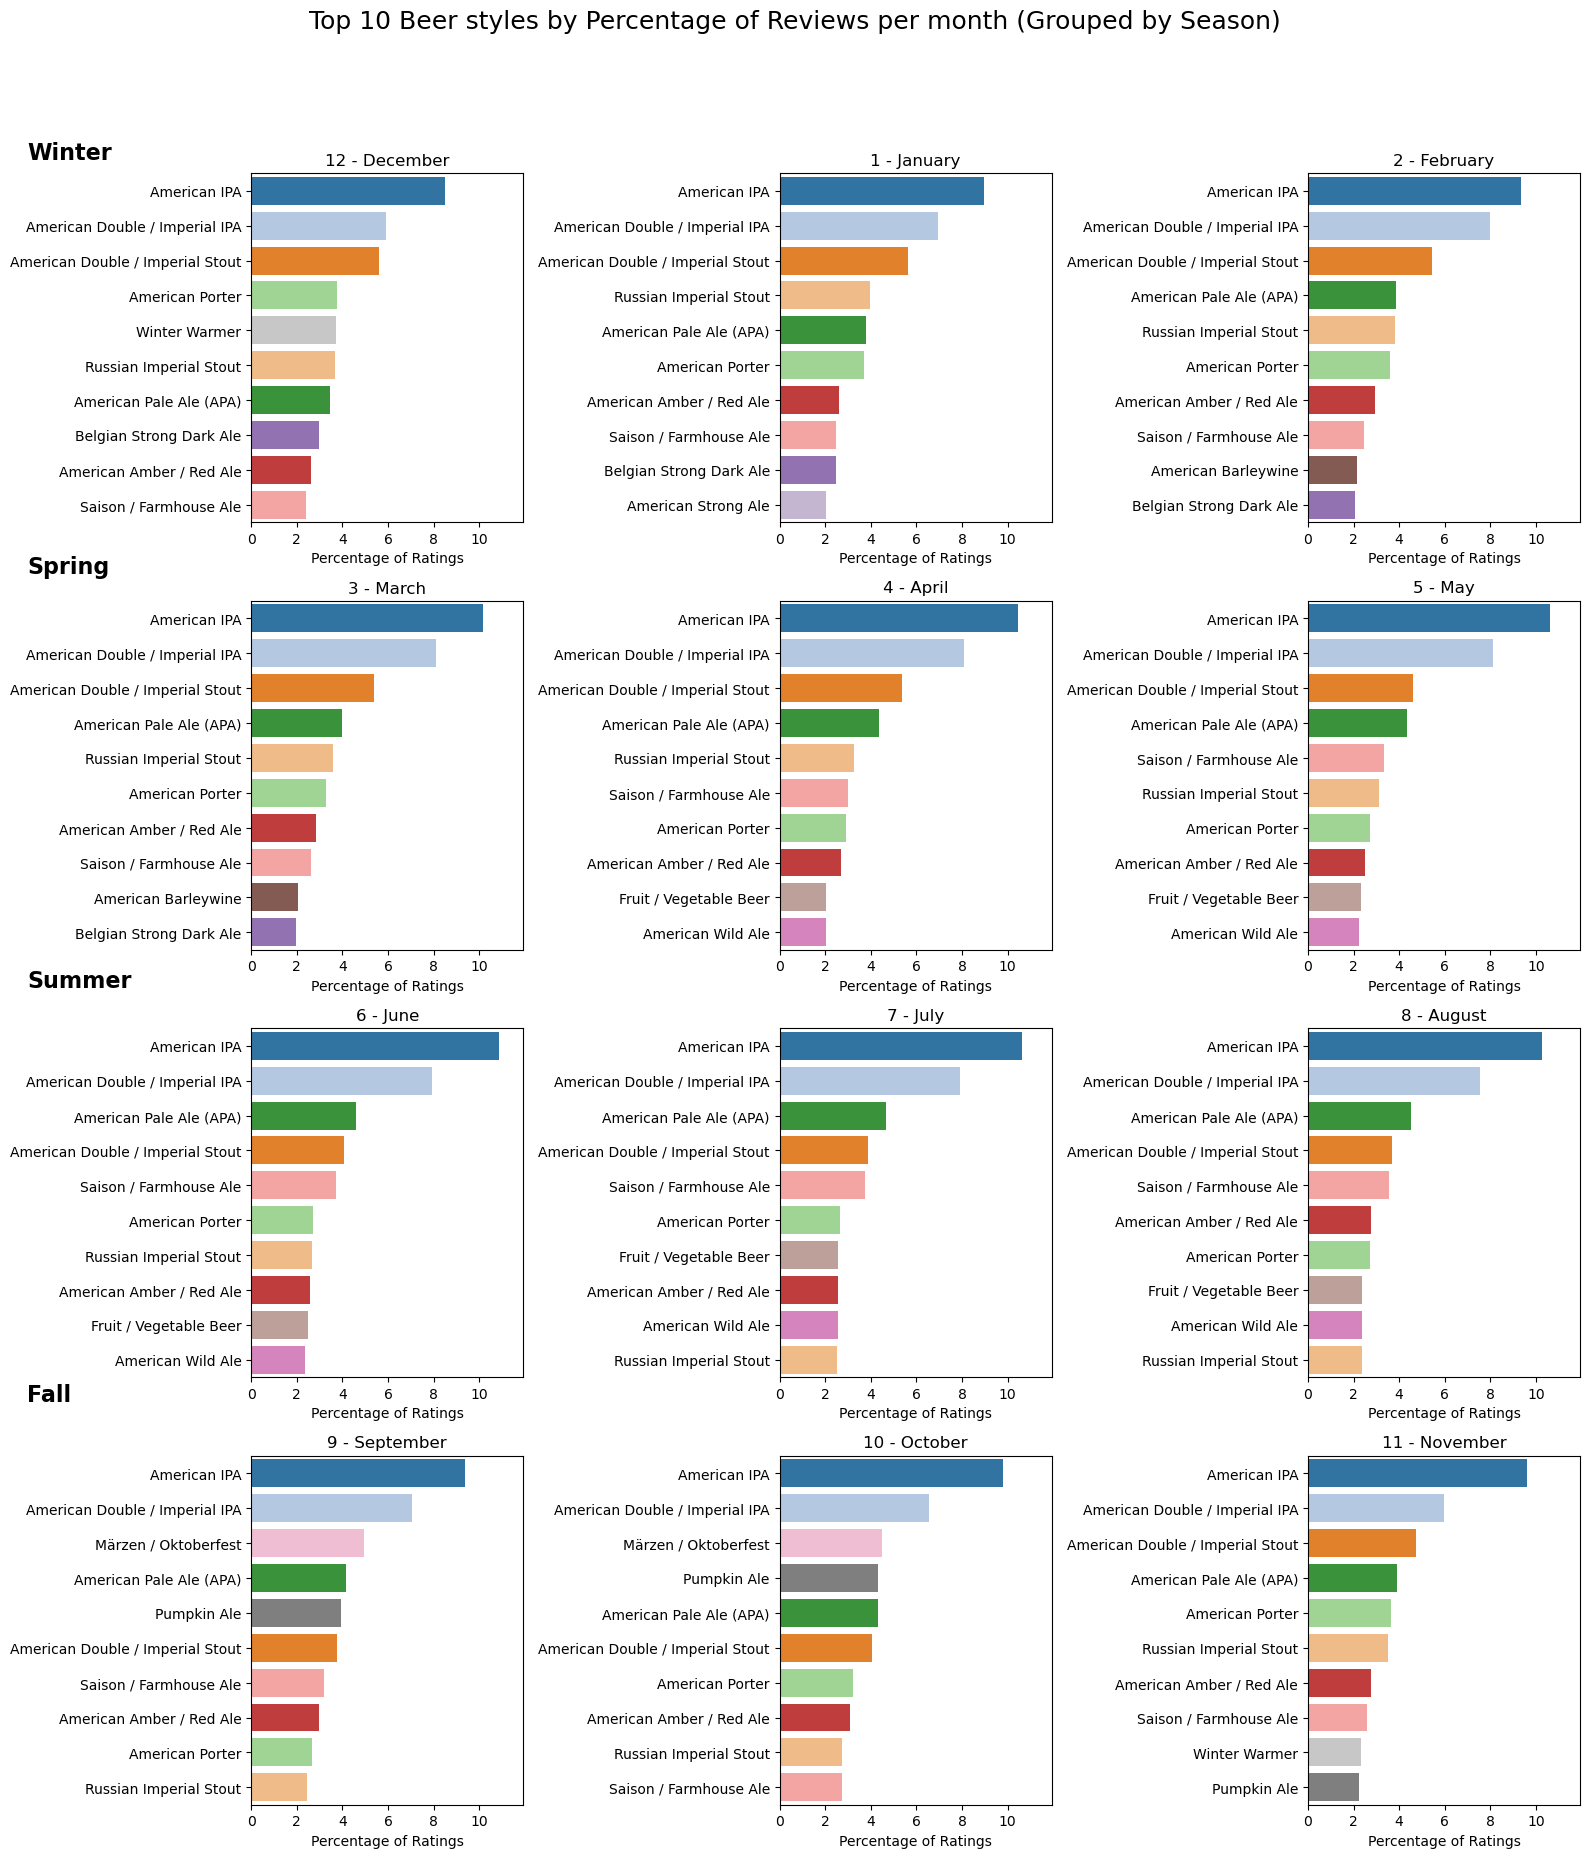

In [7]:
top_styles_per_month_percentage = helper.top_k_beer_styles_percentage(df = df, k = 10, group_by = 'month')

unique_styles = top_styles_per_month_percentage['style'].unique()
palette = sns.color_palette("tab20", len(unique_styles))
style_colors = dict(zip(unique_styles, palette))

# Define the seasons and their corresponding months
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# Calculate a global maximum for the x-axis limit
max_percentage = top_styles_per_month_percentage['percentage'].max()

fig, axes = plt.subplots(4, 3, figsize=(16, 18), constrained_layout=True)

# Loop through each season and each month within the season
for i, (season, months) in enumerate(seasons.items()):
    # Add a large subtitle for the season on the left side
    fig.text(0.02, 0.95 - i * 0.23, season, ha='left', fontsize=16, fontweight='bold', va='center')
    
    for j, month in enumerate(months):
        # Filter data for the specific month
        month_data = top_styles_per_month_percentage[top_styles_per_month_percentage['month'] == month]
        
        # Plot in the corresponding subplot
        ax = axes[i, j]
        sns.barplot(
            data=month_data,
            y='style',
            x='percentage', 
            palette=style_colors,
            ax=ax,
            hue='style',
            legend=False 
        )
        
        # Set title and labels
        ax.set_title(f"{month} - {pd.to_datetime(f'2023-{month:02d}-01').strftime('%B')}", fontsize=12)  # Display month name
        ax.set_xlabel('Percentage of Ratings')
        ax.set_ylabel('')
        ax.set_xlim(0, max_percentage * 1.1)  # Fixed x-axis limit for all plots
        ax.tick_params(axis='y', labelsize=10)

plt.suptitle("Top 10 Beer styles by Percentage of Reviews per month (Grouped by Season)", fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit the title and subtitles
plt.show()


In [10]:
import plotly.express as px

In [8]:
top_styles_per_month_percentage = helper.top_k_beer_styles_percentage(df = df, k = 10, group_by = 'month')
top_styles_per_month_percentage.head()

,month,style,rating_count,total_ratings,percentage
0,1,American IPA,18626,207511,8.975910
1,1,American Double / Imperial IPA,14424,207511,6.950957
2,1,American Double / Imperial Stout,11703,207511,5.639701
3,1,Russian Imperial Stout,8187,207511,3.945333
4,1,American Pale Ale (APA),7838,207511,3.777149


In [6]:
top_styles_per_month_percentage_sorted = top_styles_per_month_percentage.sort_values(by=['month', 'percentage'], ascending=[True, False])

In [7]:
top_styles_per_month_percentage_sorted.tail(40)

,month,style,rating_count,total_ratings,percentage
80,9,American IPA,16013,170899,9.369862
81,9,American Double / Imperial IPA,12057,170899,7.055044
82,9,Märzen / Oktoberfest,8428,170899,4.931568
83,9,American Pale Ale (APA),7082,170899,4.143968
84,9,Pumpkin Ale,6692,170899,3.915763
85,9,American Double / Imperial Stout,6410,170899,3.750753
86,9,Saison / Farmhouse Ale,5461,170899,3.195455
87,9,American Amber / Red Ale,5101,170899,2.984804
88,9,American Porter,4561,170899,2.668828
89,9,Russian Imperial Stout,4147,170899,2.426579


In [8]:
print(top_styles_per_month_percentage_sorted['style'].unique().tolist())

['American IPA', 'American Double / Imperial IPA', 'American Double / Imperial Stout', 'Russian Imperial Stout', 'American Pale Ale (APA)', 'American Porter', 'American Amber / Red Ale', 'Saison / Farmhouse Ale', 'Belgian Strong Dark Ale', 'American Strong Ale', 'American Barleywine', 'Fruit / Vegetable Beer', 'American Wild Ale', 'Märzen / Oktoberfest', 'Pumpkin Ale', 'Winter Warmer']


In [ ]:
top_styles_per_month_percentage_sorted = top_styles_per_month_percentage.sort_values(by=['month', 'percentage'], ascending=[True, False])
top_styles_list = top_styles_per_month_percentage_sorted['style'].unique().tolist()

# Create a dictionary to dynamically update the y-axis categories based on the styles present in each month
category_orders = {
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    #'style': top_styles_list
}

# Create the bar plot
fig = px.bar(
    top_styles_per_month_percentage_sorted,
    x='percentage',
    y='style',
    color='style',
    animation_frame='month',  # Creates the slider based on the 'month' column
    #category_orders=category_orders,  # Ensures months and styles are ordered correctly
    title="Top Beer Styles by Percentage of Reviews per Month",
    labels={'percentage': 'Percentage of Ratings', 'style': 'Beer Style'},
    height=600
)

fig.write_html("illustrations/Jeanne/top_styles_per_month_percentage.html")

In [41]:
import numpy as np

In [61]:
top_styles_per_month_percentage_sorted = top_styles_per_month_percentage.sort_values(by=['month', 'percentage'], ascending=[True, False])

unique_styles = top_styles_per_month_percentage['style'].unique()
palette = sns.color_palette("tab20", len(unique_styles)).as_hex()
style_colors = dict(zip(unique_styles, palette))

# Uncomment the category_orders dictionary
category_orders = {
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    #'style': top_styles_list
}

frames = [go.Frame(
    data=[go.Bar(
        x=top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == month]['percentage'],
        y=top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == month]['style'],
        orientation='h',
        marker_color=[style_colors[x] for x in top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == month]['style'].to_list()],
    )],
    name=str(month),
) for month in category_orders['month']]

fig = go.Figure(
    data=[go.Bar(
        x=top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == 1]['percentage'],
        y=top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == 1]['style'],
        orientation='h',
        marker_color=[style_colors[x] for x in top_styles_per_month_percentage_sorted[top_styles_per_month_percentage_sorted['month'] == 1]['style'].to_list()],
    )],
    layout=go.Layout(
        title="Top Beer Styles by Percentage of Reviews per Month",
        xaxis=dict(title="Percentage of Ratings"),
        yaxis=dict(title="Beer Style", automargin=True),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=1, redraw=True), fromcurrent=True)])],
            x=1.15,  # Position the button on the top right
            xanchor='right',
            y=1.15,
            yanchor='top'
        )],
        sliders=[{
            'steps': [
                {'args': [
                    [str(month)],
                    {'frame': {'duration': 1, 'redraw': True}, 'mode': 'immediate'}
                ],
                'label': str(month),
                'method': 'animate'} for month in category_orders['month']
            ],
            'transition': {'duration': 1},
            'x': 0.1,
            'len': 0.9,
            'currentvalue': {
                'prefix': 'month: ',
                'font': {'size': 20, 'color': '#666'}
            }
        }]
    ),
    frames=frames
)

fig.write_html("illustrations/Jeanne/top_styles_per_month_percentage.html")

## 1 - Define seasonal popular beers

**Seasonal Beer Popularity**: The degree to which the popularity of a beer style fluctuates throughout the year, measured by the variance of its popularity (i.e. the percentage of total monthly ratings it receives).

## 2 - Apply metrics